<a href="https://colab.research.google.com/github/anshupandey/Deep-Learning-for-structured-Data/blob/main/code_credit_default_prediction_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


```
ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

```




## Data Collection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls

In [ ]:
#load data 
df = pd.read_excel("/content/default of credit card clients.xls")
df.shape

(30001, 25)

In [ ]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
df.columns = df[0:1].values[0]
df.drop([0],inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.shape

(30000, 25)

# CNN Data Modelling

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
df2 = df[['PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
df2.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
2,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [ ]:
df2.shape

(30000, 18)



*   Each line item should be modelled as a matrix
*   Rows in a matrix should represent features - bill, pay, payamt,
*   Columns should be different instances of those features - we have six month history of the three features - we can have 6 columns
*   Current shape = (30000, 18)
*   Modelled data shape = (30000, 3, 6, 1)



In [ ]:
cnn_features = []
for i in range(1,df2.shape[0]+1):
  bill = df.loc[i,['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].values.tolist()
  pay = df.loc[i,['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].values.tolist()
  payamt = df.loc[i,['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values.tolist()
  cust_matrix = [bill,pay,payamt]
  cust_matrix = np.array(cust_matrix)
  cnn_features.append(cust_matrix)

In [ ]:
cnn_features = np.array(cnn_features)
print(cnn_features.shape)

(30000, 3, 6)


In [ ]:
# reshaping the data in the channel format
cnn_features = cnn_features.reshape(30000,3,6,1)
print(cnn_features.shape)

(30000, 3, 6, 1)


In [ ]:
# demo of concatenation - not useful for current code
cnn_final = np.concatenate((cnn_features,cnn_features),axis=3)
cnn_final.shape

(30000, 3, 6, 2)

In [ ]:
y = df['default payment next month']
y.shape

(30000,)

In [ ]:
cnn_features.shape

(30000, 3, 6, 1)

In [ ]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [ ]:
df.SEX.unique()

array([2, 1], dtype=object)

In [ ]:
df.SEX = np.where(df.SEX==1,1,0)
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=object)

In [ ]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
def changeed(x):
  if x in [1,2,3]:
    return x
  else:
    return 0
df.EDUCATION = df.EDUCATION.apply(changeed)
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

In [ ]:
df.MARRIAGE.value_counts()
# MARRIAGE: Marital status (1=married, 2=single, 3=others)
df.MARRIAGE = np.where(df.MARRIAGE==1,1,0)

In [ ]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,0,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,0,2,0,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
x2 = df[['LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE']]

## modelling of CNN

In [ ]:
from tensorflow.keras import models,layers

In [ ]:
ip1 = layers.Input(shape=(3,6,1),name='CNN Input')

c1 = layers.Conv2D(16,(3,10),padding='same')(ip1)
c1 = layers.BatchNormalization()(c1)
c1 = layers.Activation('relu')(c1)

c2 = layers.Conv2D(32,(3,10),padding='same')(c1)
c2 = layers.BatchNormalization()(c2)
c2 = layers.Activation('relu')(c2)


p1 = layers.MaxPooling2D()(c2)

ft = layers.Flatten(name='Flatten')(p1)
#####################################################################
ip2 = layers.Input(shape=(4,),name='DNN Input')

d1 = layers.Dense(6)(ip2)
d1 = layers.BatchNormalization()(d1)
d1 = layers.Activation('relu')(d1)
######################################################################

final_features = layers.concatenate([ft,d1],axis=1)

h1 = layers.Dense(100)(final_features)
h1 = layers.BatchNormalization()(h1)
h1 = layers.Activation('relu')(h1)

h2 = layers.Dense(40,activation='relu')(h1)

op= layers.Dense(1,activation='sigmoid')(h2)

model = models.Model(inputs=[ip1,ip2],outputs=op)
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
CNN Input (InputLayer)          [(None, 3, 6, 1)]    0                                            
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 3, 6, 16)     496         CNN Input[0][0]                  
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 3, 6, 16)     64          conv2d_18[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 3, 6, 16)     0           batch_normalization[0][0]        
____________________________________________________________________________________________

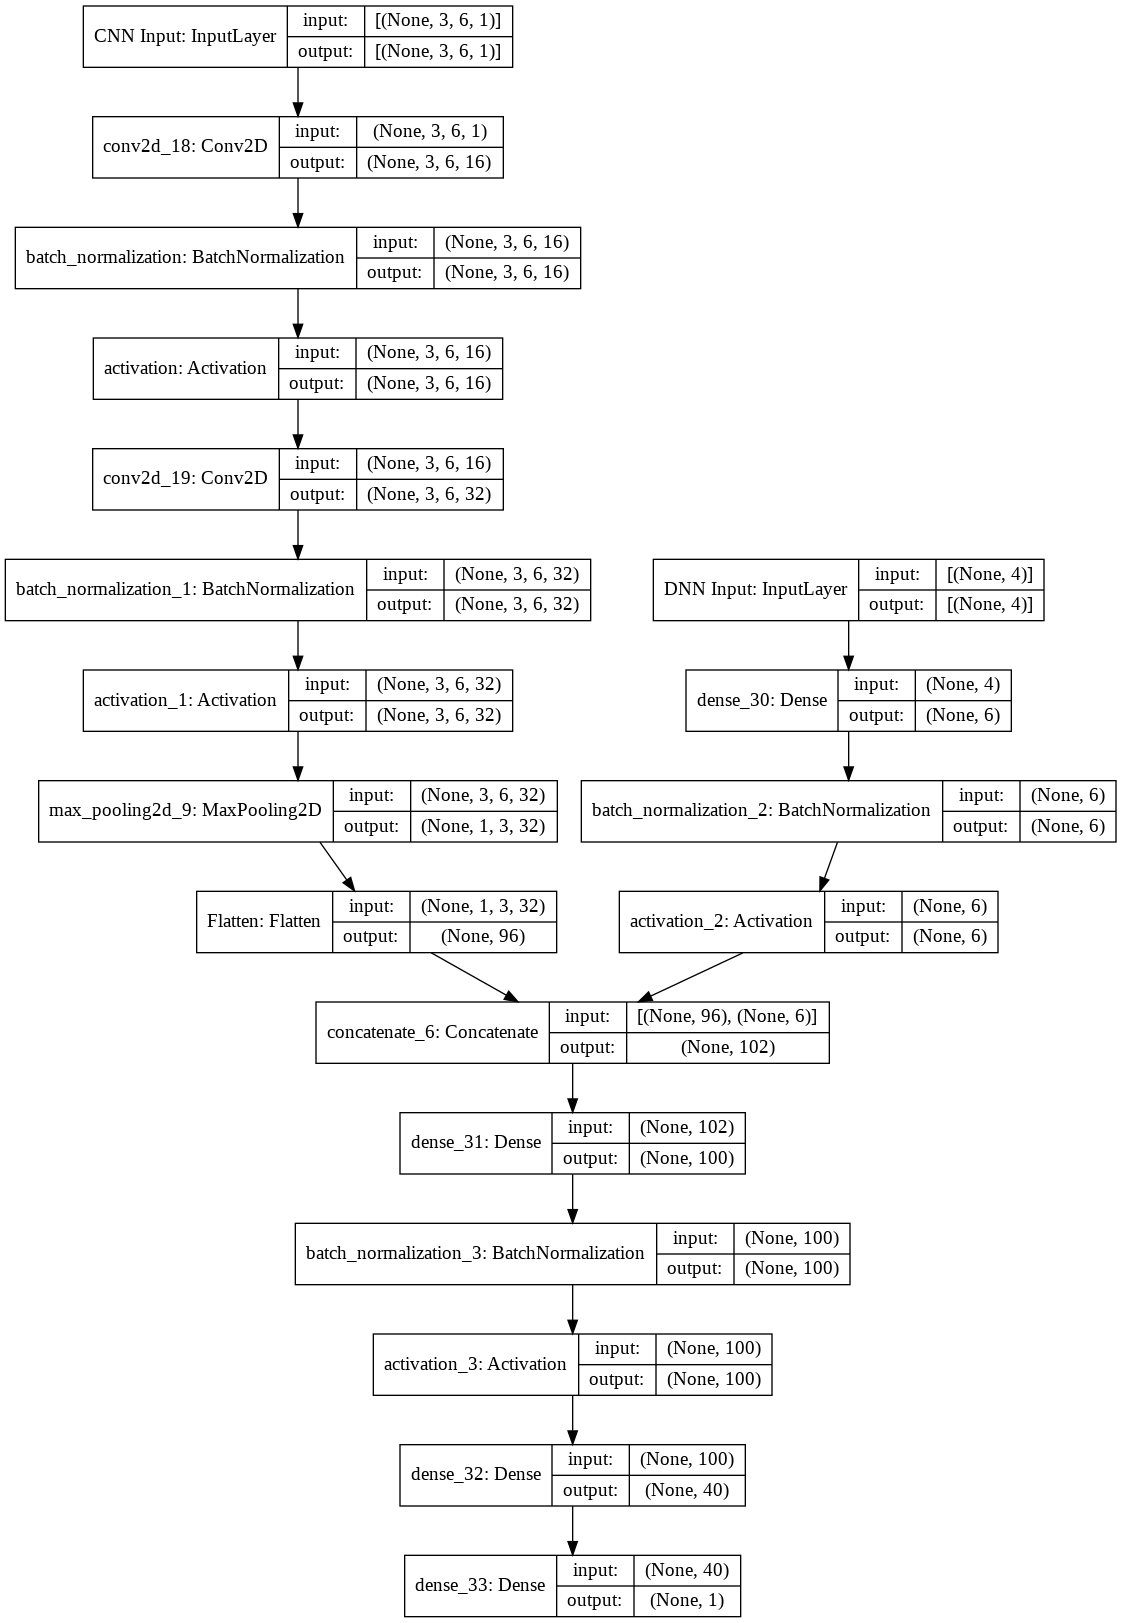

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [ ]:
x2 = np.array(x2,dtype='float64')
cnn_features = cnn_features.astype('float64')
y = np.array(y,dtype='float64')

In [ ]:
print(cnn_features.shape,x2.shape,y.shape)

(30000, 3, 6, 1) (30000, 4) (30000,)


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x=[cnn_features,x2],y=y,batch_size=1000,epochs=20,validation_split=0.2,shuffle=True)

Epoch 1/20
24/24 [==============================] - 4s 109ms/step - loss: 0.5844 - accuracy: 0.7073 - val_loss: 0.5341 - val_accuracy: 0.7890
Epoch 2/20
24/24 [==============================] - 2s 101ms/step - loss: 0.5095 - accuracy: 0.7760 - val_loss: 0.5307 - val_accuracy: 0.7890
Epoch 3/20
24/24 [==============================] - 2s 100ms/step - loss: 0.5002 - accuracy: 0.7764 - val_loss: 0.5503 - val_accuracy: 0.7495
Epoch 4/20
24/24 [==============================] - 2s 100ms/step - loss: 0.4947 - accuracy: 0.7760 - val_loss: 0.5499 - val_accuracy: 0.7538
Epoch 5/20
24/24 [==============================] - 2s 100ms/step - loss: 0.4916 - accuracy: 0.7765 - val_loss: 0.4995 - val_accuracy: 0.7885
Epoch 6/20
24/24 [==============================] - 2s 101ms/step - loss: 0.4903 - accuracy: 0.7765 - val_loss: 0.4936 - val_accuracy: 0.7892
Epoch 7/20
24/24 [==============================] - 2s 101ms/step - loss: 0.4877 - accuracy: 0.7763 - val_loss: 0.4859 - val_accuracy: 0.7890
Epoch 